In [ ]:
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
from pathlib import Path
import gzip
import matplotlib.pyplot as plt

In [ ]:
datasetName = "debate2024_Jun_mastodon"
dataPath = Path("Data")

In [ ]:
with gzip.open(dataPath / f"{datasetName}.feather.gz", 'rb') as f:
    df = pd.read_feather(f)

In [ ]:
df

In [ ]:
df.head(5)

In [ ]:
df.tail(5)

In [ ]:
df.text.head(5)

In [ ]:
df["text"].head(5)

In [ ]:
df.keys()

In [ ]:
df.post_type

In [ ]:
df.post_type.value_counts()

In [ ]:
df.iloc[0]

In [ ]:
df.dtypes

In [ ]:
df['creation_date'].dt.date.value_counts().sort_index().plot(rot=90)

In [ ]:
df["data_langs"].value_counts(ascending=True).tail(20).plot(kind='barh',logx=True,ylabel="Language",xlabel="Number of posts")

In [ ]:
# get counts of the hashtags
# hashtags are lists of strings
# clean each hashtag
hashtags = df["hashtags"].dropna().apply(lambda hashtagList: [hashtag.lower().strip() for hashtag in hashtagList])
hashtagsExploded = hashtags.explode()
hashtagsExplodedCounts = hashtagsExploded.value_counts(ascending=True)
hashtagsExplodedCounts.tail(20).plot(kind='barh',xlabel="Number of posts",ylabel="Hashtag")

In [ ]:
top_hashtags = hashtagsExplodedCounts.tail(10).iloc[::-1].index
days = df['creation_date'].dt.date.unique()
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for hashtag in top_hashtags:
    posts_with_hashtag = df[hashtags.apply(lambda hashtags: hashtag in hashtags)]
    posts_with_hashtag['creation_date'].dt.date.value_counts().sort_index().plot(rot=90, label=hashtag, ax=ax)
plt.legend()


In [ ]:
# get the top servers by number of posts user_id is https://<server>/...
df["user_id"].str.extract(r"https://([^/]+)")[0].value_counts(ascending=True).tail(20).plot(kind='barh',logx=True,ylabel="Server",xlabel="Number of posts")

In [ ]:
display(df.iloc[df["data_account_followers_count"].argmax()])

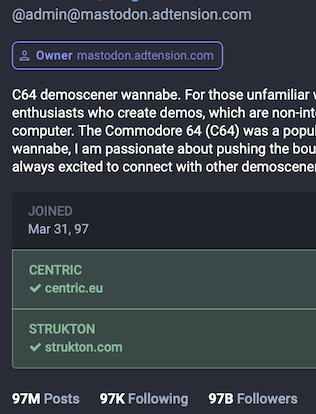

In [ ]:
df[df["user_id"].str.startswith("https://mastodon.social/").astype(bool)]

In [ ]:
dfOnlyMastodonSocial = df[df["user_id"].str.startswith("https://mastodon.social/").fillna(False)]
dfOnlyMastodonSocial

In [ ]:
display(dfOnlyMastodonSocial.iloc[dfOnlyMastodonSocial["data_account_followers_count"].argmax()])


In [ ]:
df["data_account_bot"].value_counts()

In [ ]:
# Remove bots

In [ ]:
# Custom from the audience